# QCoDeS Example with the Rigol DS 1074 Z oscilloscope

This notebook presents the implementation of QCoDeS driver for the Rigol DS1074Z oscilloscope.

## Importing dependencies 

In [1]:
import visa

#Qcodes import
from qcodes.dataset.plotting import plot_dataset
from qcodes.instrument_drivers.rigol.DS1074Z import DS1074Z
from qcodes.instrument.parameter import expand_setpoints_helper
from qcodes import initialise_database, load_or_create_experiment, Measurement

## Create the instrument 

The instrument is created in the following way. The address can be found using the NI-MAX explorer.

In [2]:
rigol = DS1074Z('rigol', 'USB0::0x1AB1::0x04CE::DS1ZB161650342::INSTR')

Connected to: RIGOL TECHNOLOGIES DS1074Z (serial:DS1ZB161650342, firmware:00.04.00) in 5.44s


## Trigger setup  

Trigger source can be set to any channel (1 to 4). Here we use the input signal from channel 1 itself as a source for trigger. 

In [3]:
rigol.trigger_edge_source('ch1')
rigol.trigger_edge_slope('negative')

The trigger-mode type supported by this oscilloscope are `edge`, `pulse`, `video` and `pattern`. Both the trigger mode and trigger level can be set in the following manner. 

In [4]:
rigol.trigger_mode('edge')
rigol.trigger_level(0.2)

## Data acquisition and plotting

 This particular driver implements acquiring the trace as a `ParameterWithSetpoints`. This means that one can use the `expand_setpoints_helper` convenience function when calling add_results. Here, we show how the trace can be measured and plotted. For more information on `ParameterWithSetpoints` refer to [this notebook](http://qcodes.github.io/Qcodes/examples/Parameters/Simple-Example-of-ParameterWithSetpoints.html).

In [5]:
initialise_database()
exp = load_or_create_experiment(experiment_name='Oscilloscope trace',
                               sample_name='no_name')

In [6]:
meas_helper = Measurement(exp=exp)
meas_helper.register_parameter(rigol.channels.ch1.trace)

with meas_helper.run() as datasaver:
        datasaver.add_result(*expand_setpoints_helper(rigol.channels.ch1.trace))

Starting experimental run with id: 5


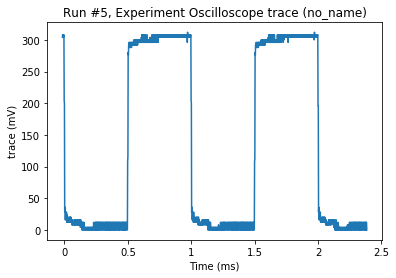

In [7]:
_ = plot_dataset(datasaver.dataset)